In [ ]:
##### 2020 ####

!pip install --upgrade pandas
import pandas as pd
import re
import string
import warnings
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Sastrawi
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


pd.set_option('display.max_colwidth',250)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


pd.set_option('display.max_colwidth',250)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

# New Section

In [ ]:
url_dataset = '/content/drive/MyDrive/Datasets/vaksin/vaksin_data_kelompok3_label.csv'
dataset = pd.read_csv(url_dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head(10)

,Unnamed: 0,Tweet,VALUE
0,602,aaa efek vaksin ya get well soon our hyem,SETUJU VAKSIN
1,237,abis kena covid udah vaksin kali gunung nih aman,SETUJU VAKSIN
2,621,abis vaksin,SETUJU VAKSIN
3,869,abis vaksin dada kanan gue yg rusuk sakit ya,SETUJU VAKSIN
4,793,abis vaksin eh lupa sy dapet tugas pjok suruh push up sit up dll,SETUJU VAKSIN
5,482,abis vaksin lapar ya pusing lagi,SETUJU VAKSIN
6,932,abis vaksin nonton bioskop dasar alhamdulillah dose efek,SETUJU VAKSIN
7,909,acehkini puluh asn jaring razia vaksin kota subulussalam aceh acehkini,SETUJU VAKSIN
8,245,adem gin gak cepat vaksinasi sedia vaksin booster lansia vaksin d,SETUJU VAKSIN
9,329,aduhai vaksin tarikh luput some perlu booster flu vaccine tu kena amik dose annually vaksin hepatitis perlu booster dah dewasa if badan produce enough antibody nak fight takpe la sebar bebukan,SETUJU VAKSIN


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
dataset.VALUE[dataset.VALUE == 'SETUJU VAKSIN'] = 1
dataset.VALUE[dataset.VALUE == 'ANTI VAKSIN'] = 0

In [ ]:
print(dataset.shape)

(478, 3)


In [ ]:
train = dataset[:350]
test = dataset [351:]

In [ ]:
print(dataset.shape)
dataset.info()
dataset.head(10)

(478, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  478 non-null    int64 
 1   Tweet       478 non-null    object
 2   VALUE       460 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.3+ KB


,Unnamed: 0,Tweet,VALUE
0,602,aaa efek vaksin ya get well soon our hyem,1
1,237,abis kena covid udah vaksin kali gunung nih aman,1
2,621,abis vaksin,1
3,869,abis vaksin dada kanan gue yg rusuk sakit ya,1
4,793,abis vaksin eh lupa sy dapet tugas pjok suruh push up sit up dll,1
5,482,abis vaksin lapar ya pusing lagi,1
6,932,abis vaksin nonton bioskop dasar alhamdulillah dose efek,1
7,909,acehkini puluh asn jaring razia vaksin kota subulussalam aceh acehkini,1
8,245,adem gin gak cepat vaksinasi sedia vaksin booster lansia vaksin d,1
9,329,aduhai vaksin tarikh luput some perlu booster flu vaccine tu kena amik dose annually vaksin hepatitis perlu booster dah dewasa if badan produce enough antibody nak fight takpe la sebar bebukan,1


In [ ]:
dataset.describe()

,Unnamed: 0
count,478.000000
mean,498.171548
std,304.236371
min,0.000000
25%,212.250000
50%,499.000000
75%,753.250000
max,1055.000000


In [ ]:
train['VALUE'].value_counts()

1    286
0     50
Name: VALUE, dtype: int64

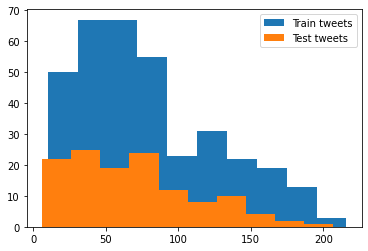

In [ ]:
panjang_train_dataset = train['Tweet'].str.len()
panjang_test_dataset = test['Tweet' ].str.len()
plt.hist(panjang_train_dataset, bins=10, label='Train tweets')
plt.hist(panjang_test_dataset, bins = 10,label='Test tweets')
plt.legend()
plt.show()

In [ ]:
gabung = train.append(test, ignore_index = True)
gabung['Tweet'] = gabung['Tweet'].fillna("aaa")
gabung.shape

(477, 3)

In [ ]:
gabung['Tweet'] = gabung['Tweet'].apply(lambda x:' '.join([w for w in x.split()if len(w)>3]))
gabung.head(3)

In [ ]:
tokenisasi = gabung['Tweet'].apply(lambda x:x.split())
tokenisasi.head(3)

In [ ]:
#bagian code 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer() 
tokenisasi = tokenisasi.apply(lambda x: [stemmer.stem(i) for i in x])


In [ ]:
for i in range(len(tokenisasi)):
    tokenisasi[i] = ' '.join(tokenisasi[i])
gabung['Tweet']=tokenisasi

#pemetaan kata2
kata2 = ' '.join([text for text in gabung['Tweet']])
wordcloud = WordCloud(width = 900, height= 600, random_state = 20, max_font_size = 80,background_color = 'white',min_font_size = 20).generate(kata2)
plt.figure(figsize=(10,7))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

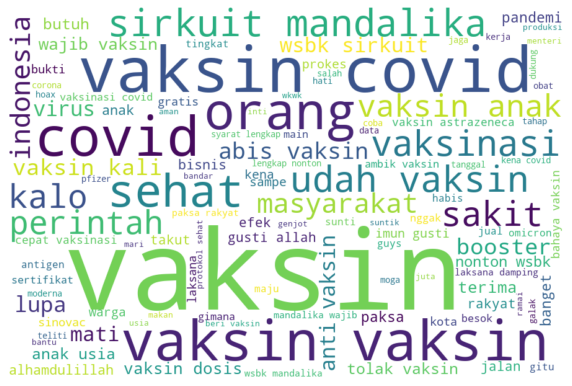

In [ ]:
#pemetaan kata2
kata2 = ' '.join([text for text in gabung['Tweet']])
wordcloud = WordCloud(width = 900, height= 600,random_state = 20, background_color = 'white', min_font_size = 12,max_font_size = 180).generate(kata2)
plt.figure(figsize=(10,7))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

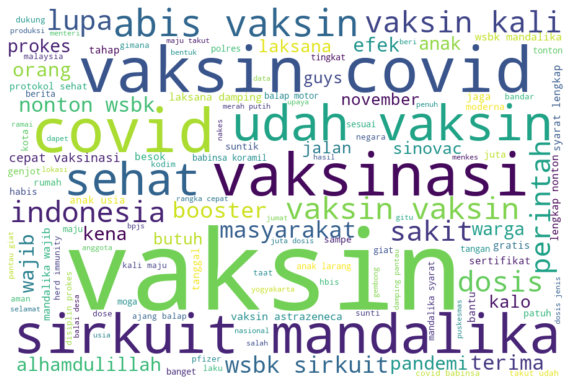

In [ ]:
#setuju vaksin
kata_waras = ' '.join([text for text in gabung['Tweet'][gabung['VALUE']== 1]])
wordcloud = WordCloud(width = 900, height= 600, random_state = 20, background_color = 'white', min_font_size = 12,max_font_size = 180).generate(kata_waras)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

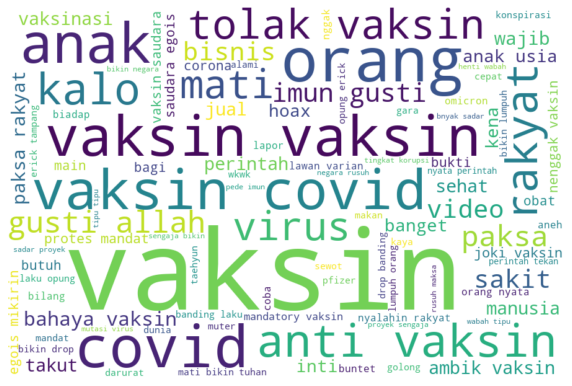

In [ ]:
#anti vaksin
kata_sakit = ' '.join([text for text in gabung['Tweet'][gabung['VALUE']== 0]])
wordcloud = WordCloud(width = 900, height= 600, random_state = 20, background_color = 'white', min_font_size = 12,max_font_size = 180).generate(kata_sakit)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hashtag human (Kode tidak berguna)
def hashtag_unik(x):
    hashtag = []
    for i in x :
        ht = re.findall(r"#(\w+)",i)
        hashtag.append(ht)
    return hashtag


In [ ]:
ht_normal = hashtag_unik(gabung['Tweet'][gabung['VALUE']=='SETUJU VAKSIN'])
ht_abnormal = hashtag_unik(gabung['Tweet'][gabung['VALUE']=='ANTI VAKSIN'])
ht_normal = sum(ht_normal,[])
ht_abnormal = sum(ht_abnormal,[])

In [ ]:
 tweet_normal = nltk.FreqDist(ht_normal)
df = pd.DataFrame({'Hashtag': list(tweet_normal.keys()),'Count': list(tweet_normal.values())})

df = df.nlargest(columns = 'Count', n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x = 'Hashtag', y = 'Count')
ax.set(ylabel= 'Count')
plt.show()

ValueError: ignored

<Figure size 1152x360 with 0 Axes>

In [ ]:
#setiap baris di matrix m menampung frekuensi token di dokumen 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=0, max_features = 4)
bow = bow_vectorizer.fit_transform(gabung['Tweet'])
bow.shape
print(bow)

In [ ]:
#TF-IDF

#TF = (berapa kali munculnya sebuah istilah di dokumen)/(jumlah istilah di dukumen)
#IDF = log(N/n) (N adalah jumlah dokumen dan n adalah jumlah dokumen yang memiliki istilah tersebut)

#TF-IDF = TF*IDF
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, max_features = 4)
tfidf = tfidf_vectorizer.fit_transform(gabung['Tweet'])
tfidf.shape


(998, 4)

In [ ]:



gabung = gabung.fillna(0)
X_train,X_test,y_train, y_test = train_test_split(bow,gabung['VALUE'], test_size = 0.1, random_state = 69)

In [ ]:
print('X_train shape : ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)


X_train shape :  (898, 4)
X_test shape:  (100, 4)
y_train shape :  (898,)
y_test shape :  (100,)


In [ ]:
print(y_test)

822    0
997    0
890    0
780    0
965    0
      ..
27     1
968    0
30     1
260    1
236    1
Name: VALUE, Length: 100, dtype: int64


In [ ]:
#multinomial naive bayes

model_naive_bayesnya = MultinomialNB().fit(X_train,y_train)
prediksi_naifnya = model_naive_bayesnya.predict(X_test)

In [ ]:
dataset.info

<bound method DataFrame.info of                                                                                                                                           Tweet  \
0                                                                                                     aaa efek vaksin ya get well soon our hyem   
1                                                                                              abis kena covid udah vaksin kali gunung nih aman   
2                                                                                                                                   abis vaksin   
3                                                                                                  abis vaksin dada kanan gue yg rusuk sakit ya   
4                                                                              abis vaksin eh lupa sy dapet tugas pjok suruh push up sit up dll   
..                                                                                    

<function matplotlib.pyplot.show(*args, **kw)>

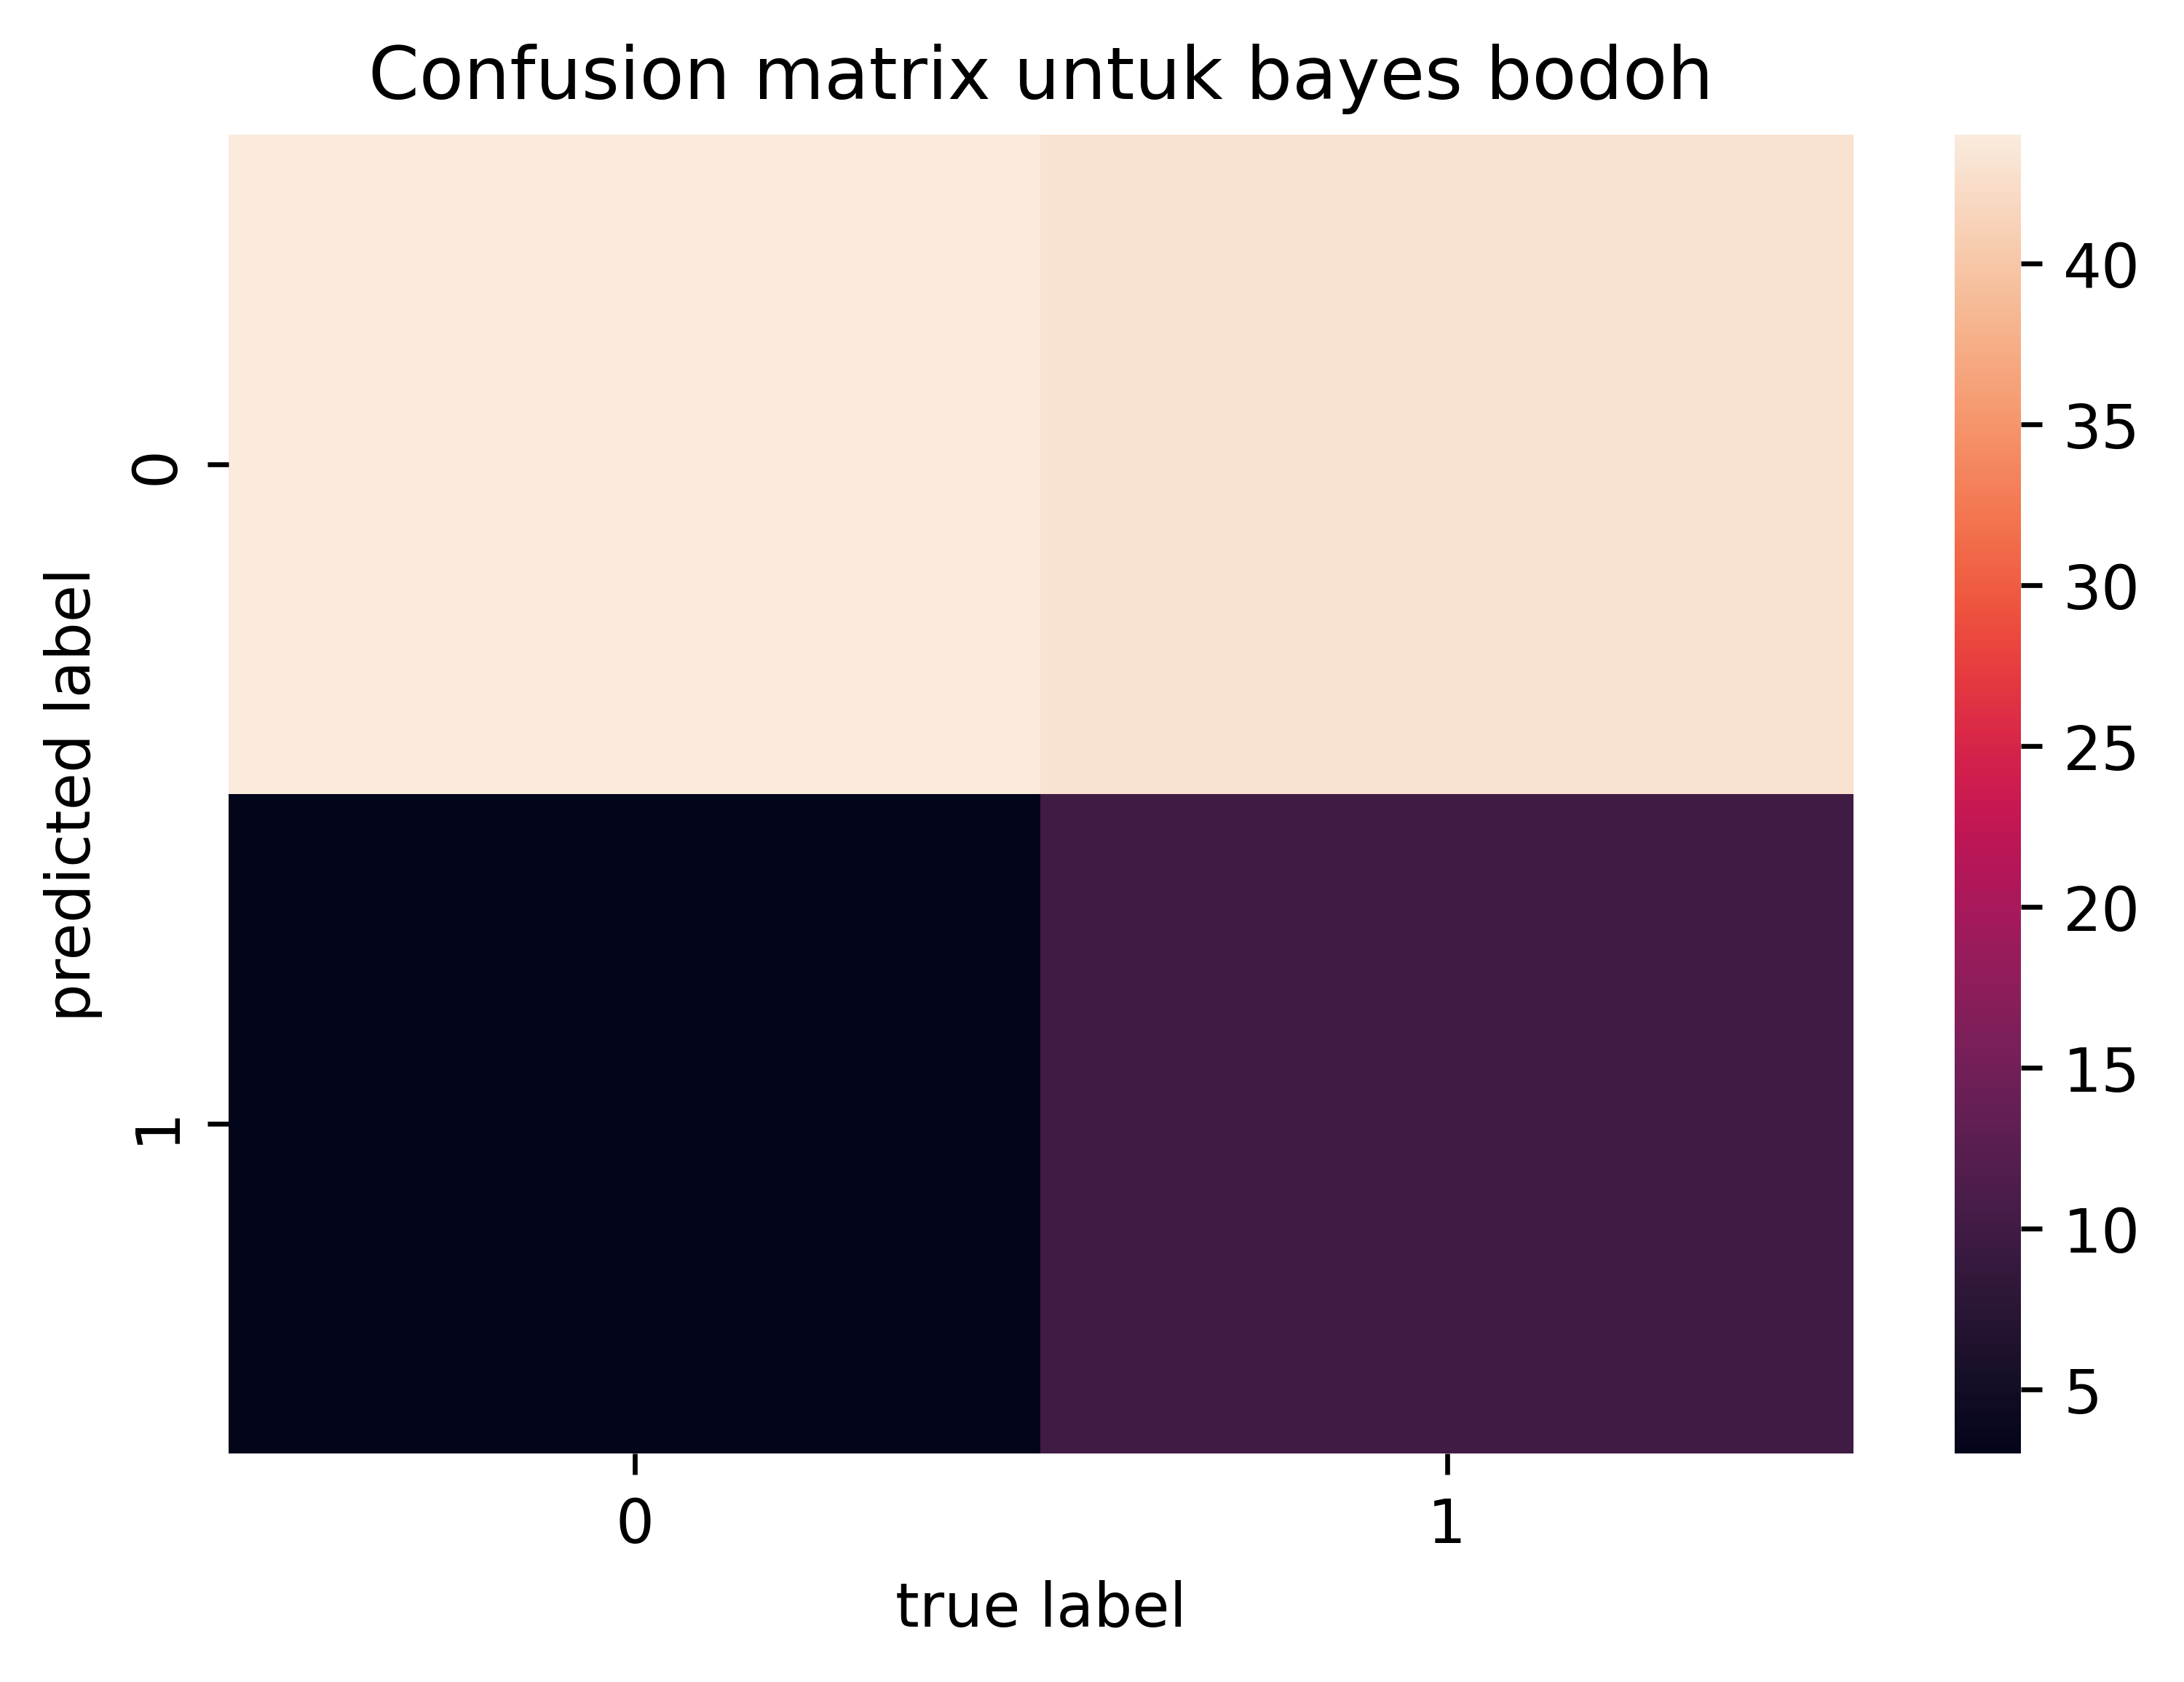

In [ ]:
#confusion matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, prediksi_naifnya)
sns.heatmap(mat.T)

plt.title('Confusion matrix untuk bayes bodoh')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show

In [ ]:
score = accuracy_score(prediksi_naifnya,y_test)
print('akurasinya adalah : ', score*100,'%')

akurasinya adalah :  54.0 %
